In [1]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

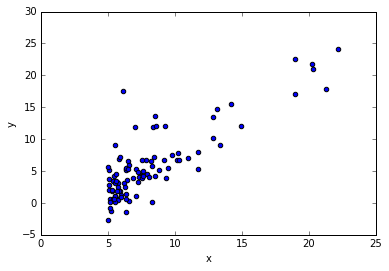

In [2]:
dataframe = pd.read_csv('challenge_dataset.txt', sep = ',', header = None)
dataframe.columns = ['x', 'y']
dataframe.plot(kind='scatter', x = 'x', y = 'y')

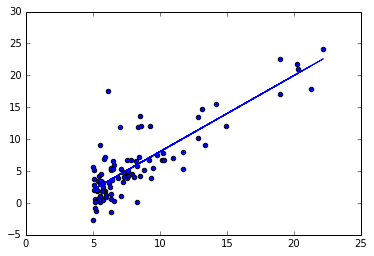

In [3]:
x_values = dataframe[['x']]
y_values = dataframe[['y']]
model = linear_model.LinearRegression()
model.fit(x_values, y_values)

#visualize results
plt.scatter(x_values, y_values)
plt.plot(x_values, model.predict(x_values))
plt.show()

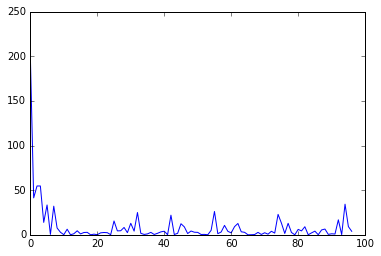

In [4]:
def calc_residuals(act, pred):
    res = (np.array(act) - np.array(pred))**2
    return res

residuals = calc_residuals(y_values, model.predict(x_values))
plt.plot(residuals)

In [5]:
print 'Mean Sqaured Error:', np.mean(residuals)
print 'Coefficient of determination:', model.score(x_values, y_values)

Mean Sqaured Error: 8.95394275195
Coefficient of determination: 0.702031553784


The linear regression model that we built exaplins only about 70% of the variation in the dataset. Further as the residual plot is not random, we can say that either we are missing parameters or that our data has a non-linear relationship

### Going for the bonus points
As I am doing this analysis as part of a (challenge)[https://github.com/llSourcell/linear_regression_demo], so to get the bonus points lets do a linear regression analysis with more than one independent variable

In [6]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ..., 
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([ 151.,   75.,  141.,  206.,  135.,   97.,  138.,   63.,  110.,
         310.,  101.,   69.,  179.,  185.,  118.,  171.,  166.,  144.,
          97.,  168.,   68.,   49.,   68.,  245.,  184.,  202.,  137.,
          85.,  131.,  283.,  129.,   59.,  341.,   87.,   65.,  102.,
         265.,  276.,  252.,   90.,  100.,   55.,   61.,   92.,  259.,

Mean Sqaured Error: 2859.69039877
Coefficient of determination: 0.517749425413


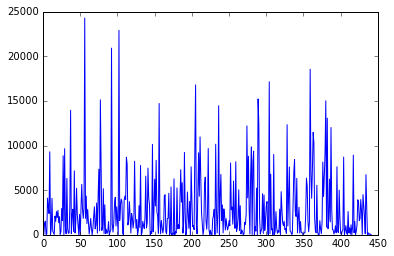

In [7]:
model.fit(diabetes.data, diabetes.target)
residuals = calc_residuals(diabetes.target, model.predict(diabetes.data))
print 'Mean Sqaured Error:', np.mean(residuals)
print 'Coefficient of determination:', model.score(diabetes.data, diabetes.target)
plt.plot(residuals)

Thats a pretty low Coefficient of determination. Hmmmmmm lets see if we can improve upon or not. 

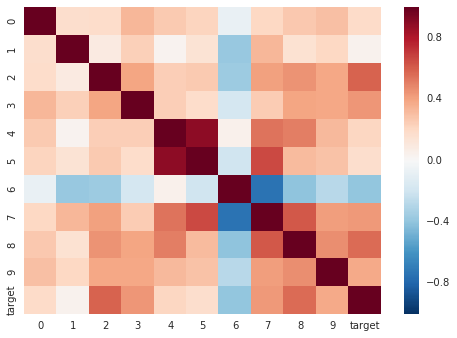

In [9]:
## Checking for correlation between the predictor variables
import seaborn as sns

df_diabetes = pd.DataFrame(diabetes.data)
df_diabetes['target'] = pd.Series(diabetes.target)
sns.heatmap(df_diabetes.corr())

This explains a lot why the linear regression model did not perform well, there is a huge amount of correlation between the predictor variable.

In [64]:
from sklearn.feature_selection import RFE
for i in range(3, 11):
    rfe = RFE(estimator=model, n_features_to_select=i, step=1)
    rfe.fit(df_diabetes.drop('target', axis = 1), df_diabetes.target)
    selected_columns = list(df_diabetes.columns[rfe.support_])
    selected_columns.append('target')
    df_diabetes_tmp = df_diabetes[selected_columns].copy()
    model.fit(df_diabetes_tmp.drop('target', axis = 1), df_diabetes_tmp.target)
    residuals = calc_residuals(df_diabetes_tmp.target, model.predict(df_diabetes_tmp.drop('target', axis = 1)))
    print 'For', i, 'features, the Mean Squared Error and Coefficient of determination are'
    print 'Mean Sqaured Error:', np.mean(residuals)
    print 'Coefficient of determination:', model.score(df_diabetes_tmp.drop('target', axis = 1), df_diabetes_tmp.target)
    print '---------------------------------------------------------------'

For 3 features, the Mean Squared Error and Coefficient of determination are
Mean Sqaured Error: 3142.69378905
Coefficient of determination: 0.470024487207
---------------------------------------------------------------
For 4 features, the Mean Squared Error and Coefficient of determination are
Mean Sqaured Error: 3104.44203955
Coefficient of determination: 0.476475160391
---------------------------------------------------------------
For 5 features, the Mean Squared Error and Coefficient of determination are
Mean Sqaured Error: 2971.37805517
Coefficient of determination: 0.498914716419
---------------------------------------------------------------
For 6 features, the Mean Squared Error and Coefficient of determination are
Mean Sqaured Error: 2876.67710479
Coefficient of determination: 0.514884832539
---------------------------------------------------------------
For 7 features, the Mean Squared Error and Coefficient of determination are
Mean Sqaured Error: 2868.33728612
Coefficient of

Even after trying out a lot of combination of number of variables, we can't seem to find any ideal combination. Another thing to note is that as the number of predictors increased the Mean squared error decreased. This should mean that there are a lot of different parameters as well which are not known to us.